# 준비작업

In [1]:
# 라이브러리 임포트 

import datetime
import time
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

from warnings import simplefilter

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['axes.unicode_minus']=False
from matplotlib.patches import Patch
import seaborn as sns
import statsmodels.api as sm1

from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline

from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.svm import SVC as svc

from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier

from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.metrics import roc_curve, plot_roc_curve
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer 

from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import RandomizedSearchCV

from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import ElasticNet
from sklearn.multioutput import MultiOutputRegressor

from sklearn.pipeline import make_pipeline

from matplotlib.colors import ListedColormap

from matplotlib.ticker import MaxNLocator

from scipy import stats
from scipy.stats import randint, uniform

#from category_encoders import OrdinalEncoder
# pip install --upgrade category_encoders

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

import lightgbm as lgb

In [2]:
# Feature engineering 작업이 완료된 csv파일

#dataset = pd.read_csv('/content/gdrive/MyDrive/project/final_featured_dataset_preprocessed_kdy_220606_3.csv')

dataset_filepath = os.getenv('HOME') + '/aiffel/final_featured_dataset_preprocessed_kdy_220606_3.csv'

dataset = pd.read_csv(dataset_filepath)
dataset

,Unnamed: 0,Date,Open,High,Low,Close,Volume,signal,EMA10,EMA30,...,NaverTrend,Kyle_lambda,Amihud_lambda,Hasbrouck_labda,Close_bf_1mim,Close_bf_2mim,Close_bf_3mim,Volume_bf_1mim,Volume_bf_2mim,Volume_bf_3mim
0,0,21-03-23 22:12,2020000,2020000,2019000,2019000,36.582210,0,2017100.864,2014596.329,...,25.36670,30.777662,0.000015,0.000064,2019000.0,2019000.0,2018000.0,17.313993,20.106467,101.666675
1,1,21-03-23 22:13,2020000,2020000,2016000,2016000,63.727452,0,2017446.162,2014880.437,...,25.36670,28.991902,0.000014,0.000059,2019000.0,2019000.0,2019000.0,36.582210,17.313993,20.106467
2,2,21-03-23 22:14,2018000,2020000,2016000,2019000,17.019108,0,2017183.223,2014952.667,...,25.36670,25.666219,0.000013,0.000060,2016000.0,2019000.0,2019000.0,63.727452,36.582210,17.313993
3,3,21-03-23 22:15,2019000,2019000,2018000,2019000,35.570307,0,2017513.546,2015213.785,...,25.36670,34.479842,0.000017,0.000078,2019000.0,2016000.0,2019000.0,17.019108,63.727452,36.582210
4,4,21-03-23 22:16,2019000,2020000,2017000,2018000,45.582501,0,2017783.811,2015458.057,...,25.36670,34.479842,0.000017,0.000078,2019000.0,2019000.0,2016000.0,35.570307,17.019108,63.727452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523093,523093,22-03-23 15:15,3666000,3667000,3665000,3665000,39.688187,0,3665095.394,3659771.930,...,4.68624,48.670278,0.000013,0.000093,3666000.0,3666000.0,3668000.0,8.164602,25.110129,68.150391
523094,523094,22-03-23 15:16,3666000,3669000,3665000,3668000,76.731647,0,3665078.050,3660109.225,...,4.68624,48.124403,0.000013,0.000091,3665000.0,3666000.0,3666000.0,39.688187,8.164602,25.110129
523095,523095,22-03-23 15:17,3668000,3671000,3667000,3669000,96.039465,0,3665609.313,3660618.307,...,4.68624,49.368770,0.000013,0.000094,3668000.0,3665000.0,3666000.0,76.731647,39.688187,8.164602
523096,523096,22-03-23 15:18,3667000,3674000,3663000,3663000,91.949217,0,3666225.802,3661159.062,...,4.68624,49.889389,0.000014,0.000096,3669000.0,3668000.0,3665000.0,96.039465,76.731647,39.688187


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523098 entries, 0 to 523097
Data columns (total 65 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       523098 non-null  int64  
 1   Date             523098 non-null  object 
 2   Open             523098 non-null  int64  
 3   High             523098 non-null  int64  
 4   Low              523098 non-null  int64  
 5   Close            523098 non-null  int64  
 6   Volume           523098 non-null  float64
 7   signal           523098 non-null  int64  
 8   EMA10            523098 non-null  float64
 9   EMA30            523098 non-null  float64
 10  EMA180           523098 non-null  float64
 11  ROC10            523098 non-null  float64
 12  ROC30            523098 non-null  float64
 13  MOM10            523098 non-null  int64  
 14  MOM30            523098 non-null  int64  
 15  %K10             523098 non-null  float64
 16  %D10             523098 non-null  floa

In [4]:
dataset

,Unnamed: 0,Date,Open,High,Low,Close,Volume,signal,EMA10,EMA30,...,NaverTrend,Kyle_lambda,Amihud_lambda,Hasbrouck_labda,Close_bf_1mim,Close_bf_2mim,Close_bf_3mim,Volume_bf_1mim,Volume_bf_2mim,Volume_bf_3mim
0,0,21-03-23 22:12,2020000,2020000,2019000,2019000,36.582210,0,2017100.864,2014596.329,...,25.36670,30.777662,0.000015,0.000064,2019000.0,2019000.0,2018000.0,17.313993,20.106467,101.666675
1,1,21-03-23 22:13,2020000,2020000,2016000,2016000,63.727452,0,2017446.162,2014880.437,...,25.36670,28.991902,0.000014,0.000059,2019000.0,2019000.0,2019000.0,36.582210,17.313993,20.106467
2,2,21-03-23 22:14,2018000,2020000,2016000,2019000,17.019108,0,2017183.223,2014952.667,...,25.36670,25.666219,0.000013,0.000060,2016000.0,2019000.0,2019000.0,63.727452,36.582210,17.313993
3,3,21-03-23 22:15,2019000,2019000,2018000,2019000,35.570307,0,2017513.546,2015213.785,...,25.36670,34.479842,0.000017,0.000078,2019000.0,2016000.0,2019000.0,17.019108,63.727452,36.582210
4,4,21-03-23 22:16,2019000,2020000,2017000,2018000,45.582501,0,2017783.811,2015458.057,...,25.36670,34.479842,0.000017,0.000078,2019000.0,2019000.0,2016000.0,35.570307,17.019108,63.727452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523093,523093,22-03-23 15:15,3666000,3667000,3665000,3665000,39.688187,0,3665095.394,3659771.930,...,4.68624,48.670278,0.000013,0.000093,3666000.0,3666000.0,3668000.0,8.164602,25.110129,68.150391
523094,523094,22-03-23 15:16,3666000,3669000,3665000,3668000,76.731647,0,3665078.050,3660109.225,...,4.68624,48.124403,0.000013,0.000091,3665000.0,3666000.0,3666000.0,39.688187,8.164602,25.110129
523095,523095,22-03-23 15:17,3668000,3671000,3667000,3669000,96.039465,0,3665609.313,3660618.307,...,4.68624,49.368770,0.000013,0.000094,3668000.0,3665000.0,3666000.0,76.731647,39.688187,8.164602
523096,523096,22-03-23 15:18,3667000,3674000,3663000,3663000,91.949217,0,3666225.802,3661159.062,...,4.68624,49.889389,0.000014,0.000096,3669000.0,3668000.0,3665000.0,96.039465,76.731647,39.688187


In [5]:
dataset.columns

Index(['Unnamed: 0', 'Date', 'Open', 'High', 'Low', 'Close', 'Volume',
       'signal', 'EMA10', 'EMA30', 'EMA180', 'ROC10', 'ROC30', 'MOM10',
       'MOM30', '%K10', '%D10', '%K30', '%D30', '%K180', '%D180', 'RSI10',
       'RSI30', 'RSI180', 'MA10', 'MA30', 'MA180', 'EMAFast', 'EMASlow',
       'MACD', 'MACDSignal', 'MACDDiff', 'MBB(MA20)', 'HBB', 'LBB', 'PDI',
       'MDI', 'ADX', 'OLCR', 'HCR', 'LCR', 'CLCR', 'VLVR', 'VMA5R', 'VMA10R',
       'VMA20R', 'VMA60R', 'VMA120R', 'BTC_close', 'DXY', 'BTCD',
       'Kimchi_premium', 'S&P500', 'Ethereum DeFi', 'News_freq', 'NaverTrend',
       'Kyle_lambda', 'Amihud_lambda', 'Hasbrouck_labda', 'Close_bf_1mim',
       'Close_bf_2mim', 'Close_bf_3mim', 'Volume_bf_1mim', 'Volume_bf_2mim',
       'Volume_bf_3mim'],
      dtype='object')

In [6]:
# 필요없는 columns 삭제
dataset=dataset.drop(['Unnamed: 0'], axis=1)
dataset.head()

,Date,Open,High,Low,Close,Volume,signal,EMA10,EMA30,EMA180,...,NaverTrend,Kyle_lambda,Amihud_lambda,Hasbrouck_labda,Close_bf_1mim,Close_bf_2mim,Close_bf_3mim,Volume_bf_1mim,Volume_bf_2mim,Volume_bf_3mim
0,21-03-23 22:12,2020000,2020000,2019000,2019000,36.582210,0,2017100.864,2014596.329,2022490.830,...,25.3667,30.777662,0.000015,0.000064,2019000.0,2019000.0,2018000.0,17.313993,20.106467,101.666675
1,21-03-23 22:13,2020000,2020000,2016000,2016000,63.727452,0,2017446.162,2014880.437,2022452.257,...,25.3667,28.991902,0.000014,0.000059,2019000.0,2019000.0,2019000.0,36.582210,17.313993,20.106467
2,21-03-23 22:14,2018000,2020000,2016000,2019000,17.019108,0,2017183.223,2014952.667,2022380.962,...,25.3667,25.666219,0.000013,0.000060,2016000.0,2019000.0,2019000.0,63.727452,36.582210,17.313993
3,21-03-23 22:15,2019000,2019000,2018000,2019000,35.570307,0,2017513.546,2015213.785,2022343.603,...,25.3667,34.479842,0.000017,0.000078,2019000.0,2016000.0,2019000.0,17.019108,63.727452,36.582210
4,21-03-23 22:16,2019000,2020000,2017000,2018000,45.582501,0,2017783.811,2015458.057,2022306.657,...,25.3667,34.479842,0.000017,0.000078,2019000.0,2019000.0,2016000.0,35.570307,17.019108,63.727452


In [7]:
dataset.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'signal', 'EMA10',
       'EMA30', 'EMA180', 'ROC10', 'ROC30', 'MOM10', 'MOM30', '%K10', '%D10',
       '%K30', '%D30', '%K180', '%D180', 'RSI10', 'RSI30', 'RSI180', 'MA10',
       'MA30', 'MA180', 'EMAFast', 'EMASlow', 'MACD', 'MACDSignal', 'MACDDiff',
       'MBB(MA20)', 'HBB', 'LBB', 'PDI', 'MDI', 'ADX', 'OLCR', 'HCR', 'LCR',
       'CLCR', 'VLVR', 'VMA5R', 'VMA10R', 'VMA20R', 'VMA60R', 'VMA120R',
       'BTC_close', 'DXY', 'BTCD', 'Kimchi_premium', 'S&P500', 'Ethereum DeFi',
       'News_freq', 'NaverTrend', 'Kyle_lambda', 'Amihud_lambda',
       'Hasbrouck_labda', 'Close_bf_1mim', 'Close_bf_2mim', 'Close_bf_3mim',
       'Volume_bf_1mim', 'Volume_bf_2mim', 'Volume_bf_3mim'],
      dtype='object')

# 3-2. Data 분리 - train/validation/test

## 3-2-1. Train and Test

In [8]:
# 훈련 및 테스트 데이터셋 분리

y= dataset["signal"]
X= dataset.loc[:, dataset.columns != 'signal']

## Data 100% 사용 

# 훈련용 data - 전체 앞시간 70%
X_train = X.loc[:366000, :]
y_train = y.loc[:366000]

# 시험용 data - 전체 뒷시간 약 30%
#             - Time lagging을 막기위해 331분 이후 사용 (366500-366169)

X_test = X.loc[366501:, :]
y_test = y.loc[366501:]

In [9]:
X_train.shape

(366001, 63)

In [10]:
X_test.shape

(156597, 63)

In [11]:
y_train.shape

(366001,)

In [12]:
y_test.shape

(156597,)

## 3-2-2. Time-Series Cross Validation 정의

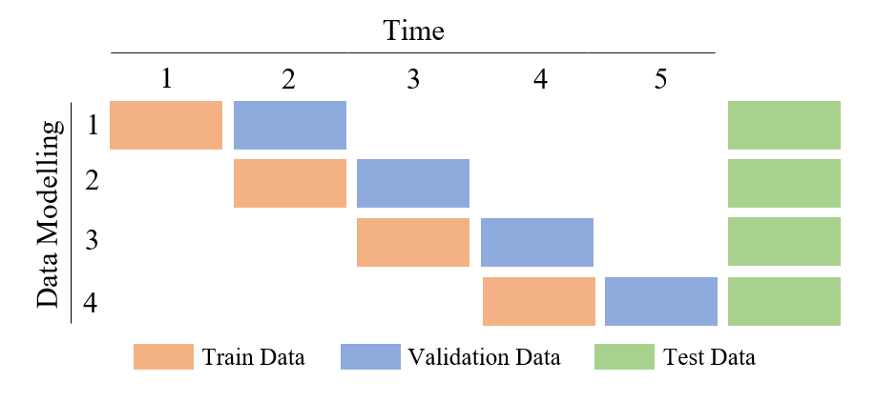

In [13]:
class BlockingTimeSeriesSplit():
    def __init__(self, n_splits):
        self.n_splits = n_splits
    
    def get_n_splits(self, X, y, groups):
        return self.n_splits
    
    def split(self, X, y=None, groups=None):
        n_samples = len(X)
        k_fold_size = n_samples // self.n_splits
        indices = np.arange(n_samples)

        margin = 0
        for i in range(self.n_splits):
            start = i * k_fold_size
            stop = start + k_fold_size
            mid = int(0.9 * (stop - start)) + start
            yield indices[start: mid], indices[mid + margin: stop]

In [14]:
btss = BlockingTimeSeriesSplit(n_splits=5)

In [15]:
sc = StandardScaler()
f1_score = make_scorer(f1_score , average='macro')

# 3-3. Learning models

## 3-3-1. LightGBM

### 3-3-1-1. Selecting Features

In [ ]:
## Data 100% 사용 

# 훈련용 data - 전체 앞시간 70%
X_train = X.loc[:366000, :]
y_train = y.loc[:366000]

# 시험용 data - 전체 뒷시간 약 30%
#             - Time lagging을 막기위해 331분 이후 사용 (366500-366169)

X_test = X.loc[366501:, :]
y_test = y.loc[366501:]

In [ ]:
X_train.columns

In [ ]:
'''
      Feature Selection 없이 모든 Features 선정
      1분,2분,3분전의 종가와 거래량 6개의 Features 추가
            
      "X_train, X_test" 저장

'''

#0. ALL Features

X_train = X_train[['EMA10', 'EMA30', 'EMA180', 'ROC10', 'ROC30', 'MOM10', 'MOM30', 
                   '%K10', '%D10', '%K30', '%D30', '%K180', '%D180', 
                   'RSI10', 'RSI30', 'RSI180', 'MA10', 'MA30', 'MA180',
                   'EMAFast', 'EMASlow', 'MACD', 'MACDSignal', 'MACDDiff',
                   'MBB(MA20)', 'HBB', 'LBB', 'PDI', 'MDI', 'ADX', 'OLCR', 'HCR', 'LCR',
                   'CLCR', 'VLVR', 'VMA5R', 'VMA10R', 'VMA20R', 'VMA60R', 'VMA120R',
                   'BTC_close', 'DXY', 'BTCD', 'Kimchi_premium', 'S&P500', 'Ethereum DeFi',
                   'News_freq', 'NaverTrend', 'Kyle_lambda', 'Amihud_lambda',
                   'Hasbrouck_labda', 
                   'Close_bf_1mim', 'Close_bf_2mim', 'Close_bf_3mim',
                   'Volume_bf_1mim', 'Volume_bf_2mim', 'Volume_bf_3mim']]
    
X_test = X_test[['EMA10', 'EMA30', 'EMA180', 'ROC10', 'ROC30', 'MOM10', 'MOM30', 
                   '%K10', '%D10', '%K30', '%D30', '%K180', '%D180', 
                   'RSI10', 'RSI30', 'RSI180', 'MA10', 'MA30', 'MA180',
                   'EMAFast', 'EMASlow', 'MACD', 'MACDSignal', 'MACDDiff',
                   'MBB(MA20)', 'HBB', 'LBB', 'PDI', 'MDI', 'ADX', 'OLCR', 'HCR', 'LCR',
                   'CLCR', 'VLVR', 'VMA5R', 'VMA10R', 'VMA20R', 'VMA60R', 'VMA120R',
                   'BTC_close', 'DXY', 'BTCD', 'Kimchi_premium', 'S&P500', 'Ethereum DeFi',
                   'News_freq', 'NaverTrend', 'Kyle_lambda', 'Amihud_lambda',
                   'Hasbrouck_labda', 
                   'Close_bf_1mim', 'Close_bf_2mim', 'Close_bf_3mim',
                   'Volume_bf_1mim', 'Volume_bf_2mim', 'Volume_bf_3mim']]

### 3-3-1-2. Random Search and Blocking Time Series Split

In [ ]:
lgbm_clf = lgb.LGBMClassifier()
pipe_lgbm = Pipeline([('scaler', sc), ('lgbm',lgbm_clf)])

In [ ]:
params = {'lgbm__n_estimators': randint(10,500),      # 트리갯수, 너무 크면 overfitting
          'lgbm__max_depth': [5, 10, 15, 20, None],   # 최대 깊이
          'lgbm__num_leaves': [50, 100, 200],         # 하나의 tree가 가지는 최대 leaf수
          'lgbm__reg_alpha': [1.1, 1.2, 1.3],         # L1 Reg.적용 값. feature갯수 많을때 적용 고려. 클수록 ovefitting 가능성 감소 효과
          'lgbm__reg_lambda': [1.1, 1.2, 1.3],        # L2 Reg.적용 값. feature갯수 많을때 적용 고려. 클수록 ovefitting 가능성 감소 효과
          'lgbm__min_split_gain': [0.3, 0.4],         # (default=0.) – Minimum loss reduction required to make a further partition on a leaf node of the tree.
          'lgbm__subsample': [0.7, 0.8, 0.9],
          'lgbm__subsample_freq': [20]
          }

In [ ]:
lgbm_rand_search = RandomizedSearchCV(estimator = pipe_lgbm,
                                      param_distributions = params,
                                      cv = btss, scoring = 'f1_macro')

In [ ]:
lgbm_rand_search.fit(X_train, y_train)

In [ ]:
lgbm_rand_search.best_params_

In [ ]:
print (f'Train Accuracy LGBM : {lgbm_rand_search.score(X_train,y_train):.3f}')
print (f'Test Accuracy LGBM : {lgbm_rand_search.score(X_test,y_test):.3f}')

### 3-3-1-3. 최적의 hyperparameters로 학습하기

In [ ]:
lgbm_clf = lgb.LGBMClassifier(max_depth=None,     # default
                              min_split_gain=0.3,
                              n_estimators=222,
                              num_leaves=200,
                              reg_alpha=1.2,
                              reg_lambda=1.1,
                              subsample=0.9,
                              subsample_freq=20)
                            #  scoring= 'f1_macro')

In [ ]:
## Model fitting

lgbm_clf.fit(X_train,y_train)

In [ ]:
## Prediction

y_pred_lgbm = lgbm_clf.predict(X_test)

### 3-3-1-4. 평가(Evaluation)

In [ ]:
'''
    Classification Report

'''

## Define the traget names
target_names = ['Down Day', 'Stay' ,'Up Day']

## Build a classifcation report
report = classification_report(y_true = y_test, y_pred = y_pred_lgbm, target_names = target_names, output_dict = True)

## Add it to a data frame, transpose it for readability.
report_df = pd.DataFrame(report).transpose()
report_df

In [ ]:
'''
    Confusion Matrix
'''

lgbm_matrix = confusion_matrix(y_test, y_pred_lgbm)
lgbm_matrix

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
lgbm_matrix_df = pd.DataFrame(lgbm_matrix,
                            index = ['Down Day','Stay','Up day'], 
                            columns = ['Down Day','Stay','Up day'])

#Plotting the confusion matrix
plt.figure(figsize=(20,16))
sns.heatmap(lgbm_matrix_df, annot=True)
plt.rc('font', size=50) 
plt.title('Confusion Matrix - LightGBM\n')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
'''
  * AUC(Area Under the ROC Curve)
  
    ROC curve의 밑면적.   
    0~1까지로 1에 가까울수록 좋은 모델   
    https://koreapy.tistory.com/752

'''


n_classes = 3
#y_score_lgbm = lgbm_clf.predict_proba(X_test)

y_prob_lgbm = lgbm_clf.predict_proba(X_test)

macro_roc_auc_ovo = roc_auc_score(y_test, y_prob_lgbm, multi_class="ovo",
                                  average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, y_prob_lgbm, multi_class="ovo",
                                     average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob_lgbm, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob_lgbm, multi_class="ovr",
                                     average="weighted")

print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print('---------------------------------------')
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

In [ ]:
'''
    Feature Importance

      Ensemble Learning의 경우 중요 Feature를 추출할 수 있는 알고리즘이 내장되어 있음
      Feature importance 측정 기준: weight, cover, gain 등
     
'''

# Calculate feature importance and store in pandas series
feature_imp = pd.Series(lgbm_clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_imp

### 3-3-1-4. 학습결과 저장(백테스팅용)

In [ ]:
# 학습모델이 예측한 Label

lgbm_predicted_label = pd.DataFrame({'LGBM_Predicted_label':y_pred_lgbm})
lgbm_predicted_label

In [ ]:
# 학습모델이 예측한 각 Labels의 예측확률

y_prob_lgbm = lgbm_clf.predict_proba(X_test)
y_prob_lgbm

In [ ]:
column_names = ['LGBM_Down Day','LGBM_Stay','LGBM_Up day']

lgbm_pred_prob = pd.DataFrame(y_prob_lgbm, columns=column_names)

In [ ]:
lgbm_pred_prob

In [ ]:
# 예측 labels과 예측 확률 합치기

lgbm_pred_prob_total = pd.merge(lgbm_predicted_label, lgbm_pred_prob, left_index=True, right_index=True)
lgbm_pred_prob_total

In [ ]:
# csv 파일 출력

lgbm_pred_prob_total.to_csv(os.getenv('HOME') + '/aiffel/lgbm_pred_prob_total_all_features_220607.csv')

## 3-3-2. Random Forest

### 3-3-2-1. Selecting Features

In [16]:
## Data 100% 사용 




# 훈련용 data - 전체 앞시간 70%
X_train = X.loc[:366000, :]
y_train = y.loc[:366000]

# 시험용 data - 전체 뒷시간 약 30%
#             - Time lagging을 막기위해 331분 이후 사용 (366500-366169)

X_test = X.loc[366501:, :]
y_test = y.loc[366501:]

In [17]:
'''
      Feature Selection 없이 모든 Features 선정
      1분,2분,3분전의 종가와 거래량 6개의 Features 추가
            
      "X_train, X_test" 저장

'''

#0. ALL Features

X_train = X_train[['EMA10', 'EMA30', 'EMA180', 'ROC10', 'ROC30', 'MOM10', 'MOM30', 
                   '%K10', '%D10', '%K30', '%D30', '%K180', '%D180', 
                   'RSI10', 'RSI30', 'RSI180', 'MA10', 'MA30', 'MA180',
                   'EMAFast', 'EMASlow', 'MACD', 'MACDSignal', 'MACDDiff',
                   'MBB(MA20)', 'HBB', 'LBB', 'PDI', 'MDI', 'ADX', 'OLCR', 'HCR', 'LCR',
                   'CLCR', 'VLVR', 'VMA5R', 'VMA10R', 'VMA20R', 'VMA60R', 'VMA120R',
                   'BTC_close', 'DXY', 'BTCD', 'Kimchi_premium', 'S&P500', 'Ethereum DeFi',
                   'News_freq', 'NaverTrend', 'Kyle_lambda', 'Amihud_lambda',
                   'Hasbrouck_labda', 
                   'Close_bf_1mim', 'Close_bf_2mim', 'Close_bf_3mim',
                   'Volume_bf_1mim', 'Volume_bf_2mim', 'Volume_bf_3mim']]
    
X_test = X_test[['EMA10', 'EMA30', 'EMA180', 'ROC10', 'ROC30', 'MOM10', 'MOM30', 
                   '%K10', '%D10', '%K30', '%D30', '%K180', '%D180', 
                   'RSI10', 'RSI30', 'RSI180', 'MA10', 'MA30', 'MA180',
                   'EMAFast', 'EMASlow', 'MACD', 'MACDSignal', 'MACDDiff',
                   'MBB(MA20)', 'HBB', 'LBB', 'PDI', 'MDI', 'ADX', 'OLCR', 'HCR', 'LCR',
                   'CLCR', 'VLVR', 'VMA5R', 'VMA10R', 'VMA20R', 'VMA60R', 'VMA120R',
                   'BTC_close', 'DXY', 'BTCD', 'Kimchi_premium', 'S&P500', 'Ethereum DeFi',
                   'News_freq', 'NaverTrend', 'Kyle_lambda', 'Amihud_lambda',
                   'Hasbrouck_labda', 
                   'Close_bf_1mim', 'Close_bf_2mim', 'Close_bf_3mim',
                   'Volume_bf_1mim', 'Volume_bf_2mim', 'Volume_bf_3mim']]

### 3-3-1-2. Random Search and Blocking Time Series Split

In [ ]:
rf_clf = RandomForestClassifier()

In [ ]:
rf_params = {'n_estimators': randint(10,500),
            'max_features':  ['auto', 'sqrt'],
            'max_depth': [5, 10, 15, 20, None],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2],
            'criterion': ['gini','entropy'],
            'bootstrap': [True, False]}

In [ ]:
rf_rand_search = RandomizedSearchCV(estimator = rf_clf, 
                                    param_distributions = rf_params)

In [ ]:
#pipe_rf = Pipeline([('scaler', sc), ('rf',rf_clf)])  

# ---- 오류남 ----
# Invalid parameter bootstrap for estimator Pipeline(steps=[('scaler', StandardScaler()), ('rf', RandomForestClassifier())]). Check the list of available parameters with `estimator.get_params().keys()`.

In [ ]:
rf_rand_search = RandomizedSearchCV(estimator = rf_clf,
                                    param_distributions = rf_params,
                                    cv = btss, scoring = 'f1_macro')

In [ ]:
rf_rand_search.fit(X_train, y_train)

In [ ]:
rf_rand_search.best_params_

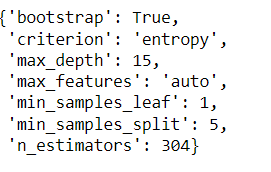

In [ ]:
print (f'Train Accuracy Random Forest : {rf_rand_search.score(X_train,y_train):.3f}')
print (f'Test Accuracy Forest : {rf_rand_search.score(X_test,y_test):.3f}')

### 3-3-2-2. 최적의 hyperparameters로 학습하기

In [20]:
rf_clf = RandomForestClassifier(bootstrap=True,
                                criterion='entropy',
                                max_depth=15,
                                max_features='auto',
                                min_samples_leaf=1,
                                min_samples_split=5,
                                n_estimators=304)

#n_estimators : 모델에서 사용할 트리 갯수(학습시 생성할 트리 갯수)
#criterion : 분할 품질을 측정하는 기능 (default : gini)
#max_depth : 트리의 최대 깊이
#min_samples_split : 내부 노드를 분할하는데 필요한 최소 샘플 수 (default : 2)
#min_samples_leaf : 리프 노드에 있어야 할 최소 샘플 수 (default : 1)
#min_weight_fraction_leaf : min_sample_leaf와 같지만 가중치가 부여된 샘플 수에서의 비율
#max_features : 각 노드에서 분할에 사용할 특징의 최대 수
#max_leaf_nodes : 리프 노드의 최대수
#min_impurity_decrease : 최소 불순도
#min_impurity_split : 나무 성장을 멈추기 위한 임계치
#bootstrap : 부트스트랩(중복허용 샘플링) 사용 여부
#oob_score : 일반화 정확도를 줄이기 위해 밖의 샘플 사용 여부
#n_jobs :적합성과 예측성을 위해 병렬로 실행할 작업 수
#random_state : 난수 seed 설정
#verbose : 실행 과정 출력 여부
#warm_start : 이전 호출의 솔루션을 재사용하여 합계에 더 많은 견적가를 추가
#class_weight : 클래스 가중치

In [22]:
# Feature Scaling

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
## Model fitting
rf_clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_split=5,
                       n_estimators=304)

In [24]:
## 예측값 저장
y_pred_rf = rf_clf.predict(X_test)

### 3-3-2-3. 평가(Evaluation)

In [25]:
'''
    Classification Report

'''

## Define the traget names
target_names = ['Down Day', 'Stay' ,'Up Day']

## Build a classifcation report
report = classification_report(y_true = y_test, y_pred = y_pred_rf, target_names = target_names, output_dict = True)

## Add it to a data frame, transpose it for readability.
rf_report_df = pd.DataFrame(report).transpose()
rf_report_df

,precision,recall,f1-score,support
Down Day,0.507510,0.547402,0.526702,54439.000000
Stay,0.368693,0.101313,0.158948,50053.000000
Up Day,0.435067,0.702428,0.537327,52105.000000
accuracy,0.456401,0.456401,0.456401,0.456401
macro avg,0.437090,0.450381,0.407659,156597.000000
weighted avg,0.439036,0.456401,0.412692,156597.000000


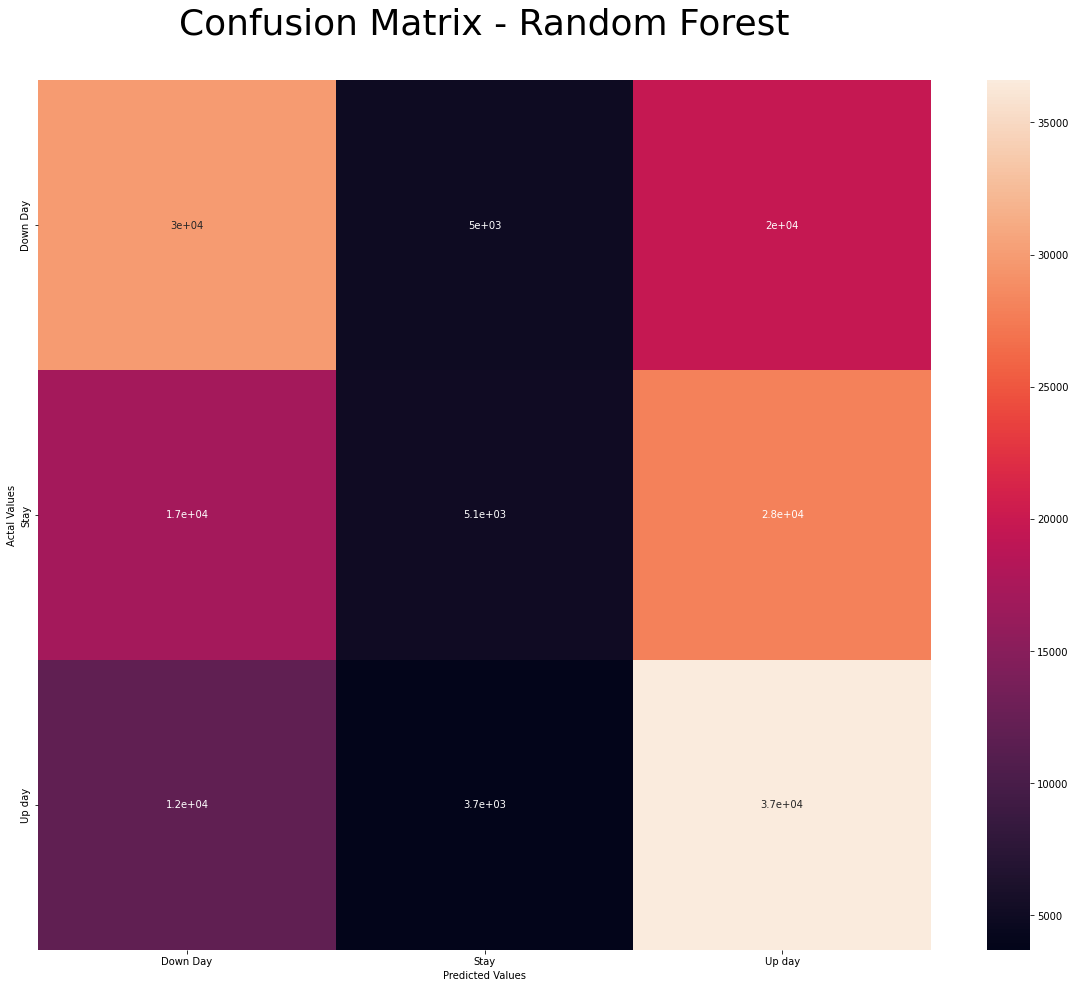

In [26]:
'''
    Confusion Matrix
'''

rf_matrix = confusion_matrix(y_test, y_pred_rf)
rf_matrix

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
rf_matrix_df = pd.DataFrame(rf_matrix,
                              index = ['Down Day','Stay','Up day'], 
                              columns = ['Down Day','Stay','Up day'])

#Plotting the confusion matrix
plt.figure(figsize=(20,16))
sns.heatmap(rf_matrix_df, annot=True)
plt.rc('font', size=30) 
plt.title('Confusion Matrix - Random Forest\n')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [27]:
'''
  * AUC(Area Under the ROC Curve)
  
    ROC curve의 밑면적.   
    0~1까지로 1에 가까울수록 좋은 모델   
    https://koreapy.tistory.com/752

'''


n_classes = 3
#y_score_lgbm = lgbm_clf.predict_proba(X_test)

y_prob_rf = rf_clf.predict_proba(X_test)

macro_roc_auc_ovo = roc_auc_score(y_test, y_prob_rf, multi_class="ovo",
                                  average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, y_prob_rf, multi_class="ovo",
                                     average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob_rf, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob_rf, multi_class="ovr",
                                     average="weighted")

print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print('---------------------------------------')
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.632613 (macro),
0.633521 (weighted by prevalence)
---------------------------------------
One-vs-Rest ROC AUC scores:
0.633366 (macro),
0.635548 (weighted by prevalence)


In [29]:
X_train = X.loc[:366000, :]

X_train = X_train[['EMA10', 'EMA30', 'EMA180', 'ROC10', 'ROC30', 'MOM10', 'MOM30', 
                   '%K10', '%D10', '%K30', '%D30', '%K180', '%D180', 
                   'RSI10', 'RSI30', 'RSI180', 'MA10', 'MA30', 'MA180',
                   'EMAFast', 'EMASlow', 'MACD', 'MACDSignal', 'MACDDiff',
                   'MBB(MA20)', 'HBB', 'LBB', 'PDI', 'MDI', 'ADX', 'OLCR', 'HCR', 'LCR',
                   'CLCR', 'VLVR', 'VMA5R', 'VMA10R', 'VMA20R', 'VMA60R', 'VMA120R',
                   'BTC_close', 'DXY', 'BTCD', 'Kimchi_premium', 'S&P500', 'Ethereum DeFi',
                   'News_freq', 'NaverTrend', 'Kyle_lambda', 'Amihud_lambda',
                   'Hasbrouck_labda', 
                   'Close_bf_1mim', 'Close_bf_2mim', 'Close_bf_3mim',
                   'Volume_bf_1mim', 'Volume_bf_2mim', 'Volume_bf_3mim']]

In [30]:
'''
    Feature Importance

      Ensemble Learning의 경우 중요 Feature를 추출할 수 있는 알고리즘이 내장되어 있음
      Feature importance 측정 기준: weight, cover, gain 등
     
'''

# Calculate feature importance and store in pandas series
feature_imp = pd.Series(rf_clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_imp

RSI180             0.065248
BTCD               0.060723
%K180              0.056825
%D180              0.056361
MA180              0.044348
DXY                0.043423
BTC_close          0.043141
EMA180             0.041953
Ethereum DeFi      0.038768
News_freq          0.036784
NaverTrend         0.035241
S&P500             0.033283
Kimchi_premium     0.026203
EMA30              0.025374
EMASlow            0.024499
MA30               0.023452
HBB                0.022947
EMAFast            0.022169
EMA10              0.022090
LBB                0.021186
MBB(MA20)          0.020746
RSI30              0.019904
Close_bf_1mim      0.019307
MA10               0.019252
Kyle_lambda        0.017577
Amihud_lambda      0.017501
Close_bf_2mim      0.016615
MACDSignal         0.015210
Close_bf_3mim      0.014831
Hasbrouck_labda    0.012978
MACD               0.012754
ROC30              0.007273
MOM30              0.006854
ADX                0.004991
MACDDiff           0.004519
%D30               0

### 3-3-2-4. 학습결과 저장(백테스팅용)

In [ ]:
# 학습모델이 예측한 Label

rf_predicted_label = pd.DataFrame({'RF_Predicted_label':y_pred_rf})

In [ ]:
rf_predicted_label

In [ ]:
y_prob_testset = rf_clf.predict_proba(X_test)
y_prob_testset

In [ ]:
column_names = ['RF_Down Day','RF_Stay','RF_Up day']
rf_pred_prob = pd.DataFrame(y_prob_testset, columns=column_names)

In [ ]:
rf_pred_prob

In [ ]:
# Predictied labels과 Prediction probabilities를 합치기

rf_pred_prob_total = pd.merge(rf_predicted_label, rf_pred_prob, left_index=True, right_index=True)
rf_pred_prob_total

In [ ]:
# csv 파일 출력

rf_pred_prob_total.to_csv(os.getenv('HOME') + '/aiffel/rf_pred_prob_all_features_220607.csv')

## 3-3-3. Logistic Regression

In [16]:
## Data 100% 사용 

# 훈련용 data - 전체 앞시간 70%
X_train = X.loc[:366000, :]
y_train = y.loc[:366000]

# 시험용 data - 전체 뒷시간 약 30%
#             - Time lagging을 막기위해 331분 이후 사용 (366500-366169)

X_test = X.loc[366501:, :]
y_test = y.loc[366501:]

In [17]:
'''
      Feature Selection 없이 모든 Features 선정
      1분,2분,3분전의 종가와 거래량 6개의 Features 추가
            
      "X_train, X_test" 저장

'''

#0. ALL Features

X_train = X_train[['EMA10', 'EMA30', 'EMA180', 'ROC10', 'ROC30', 'MOM10', 'MOM30', 
                   '%K10', '%D10', '%K30', '%D30', '%K180', '%D180', 
                   'RSI10', 'RSI30', 'RSI180', 'MA10', 'MA30', 'MA180',
                   'EMAFast', 'EMASlow', 'MACD', 'MACDSignal', 'MACDDiff',
                   'MBB(MA20)', 'HBB', 'LBB', 'PDI', 'MDI', 'ADX', 'OLCR', 'HCR', 'LCR',
                   'CLCR', 'VLVR', 'VMA5R', 'VMA10R', 'VMA20R', 'VMA60R', 'VMA120R',
                   'BTC_close', 'DXY', 'BTCD', 'Kimchi_premium', 'S&P500', 'Ethereum DeFi',
                   'News_freq', 'NaverTrend', 'Kyle_lambda', 'Amihud_lambda',
                   'Hasbrouck_labda', 
                   'Close_bf_1mim', 'Close_bf_2mim', 'Close_bf_3mim',
                   'Volume_bf_1mim', 'Volume_bf_2mim', 'Volume_bf_3mim']]
    
X_test = X_test[['EMA10', 'EMA30', 'EMA180', 'ROC10', 'ROC30', 'MOM10', 'MOM30', 
                   '%K10', '%D10', '%K30', '%D30', '%K180', '%D180', 
                   'RSI10', 'RSI30', 'RSI180', 'MA10', 'MA30', 'MA180',
                   'EMAFast', 'EMASlow', 'MACD', 'MACDSignal', 'MACDDiff',
                   'MBB(MA20)', 'HBB', 'LBB', 'PDI', 'MDI', 'ADX', 'OLCR', 'HCR', 'LCR',
                   'CLCR', 'VLVR', 'VMA5R', 'VMA10R', 'VMA20R', 'VMA60R', 'VMA120R',
                   'BTC_close', 'DXY', 'BTCD', 'Kimchi_premium', 'S&P500', 'Ethereum DeFi',
                   'News_freq', 'NaverTrend', 'Kyle_lambda', 'Amihud_lambda',
                   'Hasbrouck_labda', 
                   'Close_bf_1mim', 'Close_bf_2mim', 'Close_bf_3mim',
                   'Volume_bf_1mim', 'Volume_bf_2mim', 'Volume_bf_3mim']]

In [18]:
log_clf = LogisticRegression()     # 로지스틱 회귀 모델 객체 생성

penalty = ['l1', 'l2']                          # 페널티(penalty) 하이퍼파라미터 값의 후보를 만듭니다.
C = np.logspace(0, 5, 10)                       # 규제 하이퍼파라미터 값의 후보 범위를 만듭니다.
hyperparameters = dict(C=C, penalty=penalty)      # 하이퍼파라미터 후보 딕셔너리를 만듭니다.
#solver = ['liblinear', 'saga']

In [19]:
log_rand_search = RandomizedSearchCV(log_clf,
                                     hyperparameters)

In [20]:
# Feature Scaling

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [61]:
log_rand_search.fit(X_train, y_train)

RandomizedSearchCV(estimator=LogisticRegression(),
                   param_distributions={'C': array([1.00000000e+00, 3.59381366e+00, 1.29154967e+01, 4.64158883e+01,
       1.66810054e+02, 5.99484250e+02, 2.15443469e+03, 7.74263683e+03,
       2.78255940e+04, 1.00000000e+05]),
                                        'penalty': ['l1', 'l2']})

In [62]:
log_rand_search.best_params_

{'penalty': 'l2', 'C': 100000.0}

In [63]:
print (f'Train Accuracy - Logistic : {log_rand_search.score(X_train,y_train):.3f}')
print (f'Test Accuracy - Logistic : {log_rand_search.score(X_test,y_test):.3f}')

Train Accuracy - Logistic : 0.497
Test Accuracy - Logistic : 0.479


### 3-3-3-2. 최적의 하이퍼패러미타를 적용한 모델링 학습

In [21]:
log_clf = LogisticRegression(C=100000, penalty='l2')

In [22]:
## Model fitting

log_clf.fit(X_train,y_train)

LogisticRegression(C=100000)

In [24]:
## Prediction

y_pred_log = log_clf.predict(X_test)

### 3-3-3-3. 평가(Evaluation)

In [25]:
'''
    Classification Report

'''

## Define the traget names
target_names = ['Down Day', 'Stay' ,'Up Day']

## Build a classifcation report
log_report = classification_report(y_true = y_test, y_pred = y_pred_log, target_names = target_names, output_dict = True)

## Add it to a data frame, transpose it for readability.
log_report_df = pd.DataFrame(log_report).transpose()
log_report_df

,precision,recall,f1-score,support
Down Day,0.542575,0.566744,0.554397,54439.000000
Stay,0.376903,0.191437,0.253909,50053.000000
Up Day,0.464285,0.662144,0.545837,52105.000000
accuracy,0.478528,0.478528,0.478528,0.478528
macro avg,0.461254,0.473442,0.451381,156597.000000
weighted avg,0.463572,0.478528,0.455504,156597.000000


In [35]:
from sklearn.metrics import f1_score

In [36]:
f1_score(y_test, y_pred_log, average='micro')

0.47852768571556287

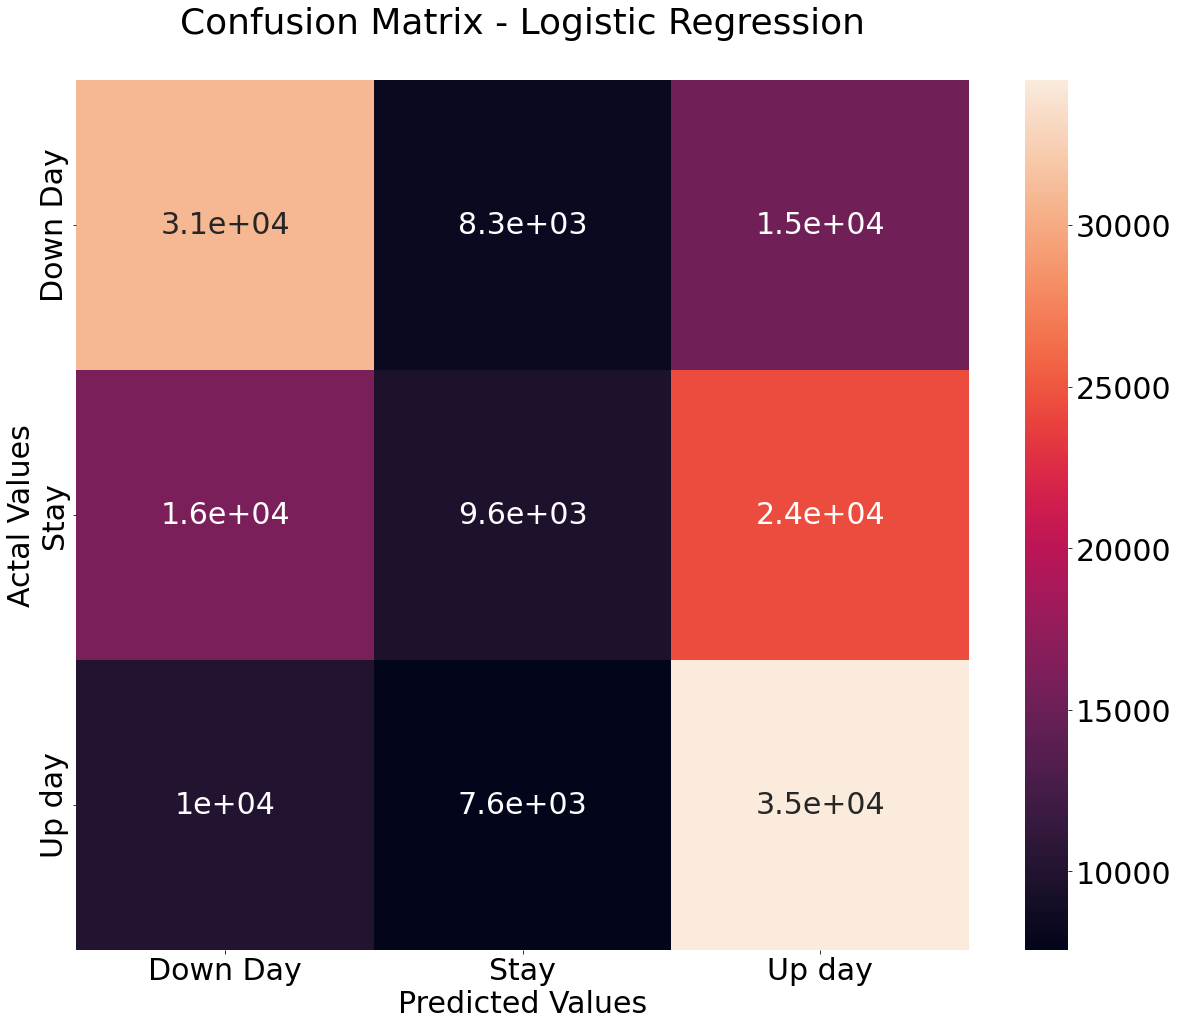

In [28]:
'''
    Confusion Matrix
'''

log_matrix = confusion_matrix(y_test, y_pred_log)
log_matrix

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
log_matrix_df = pd.DataFrame(log_matrix,
                            index = ['Down Day','Stay','Up day'], 
                            columns = ['Down Day','Stay','Up day'])

#Plotting the confusion matrix
plt.figure(figsize=(20,16))
sns.heatmap(log_matrix_df, annot=True)
plt.rc('font', size=30) 
plt.title('Confusion Matrix - Logistic Regression\n')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [27]:
'''
  * AUC(Area Under the ROC Curve)
  
    ROC curve의 밑면적.   
    0~1까지로 1에 가까울수록 좋은 모델   
    https://koreapy.tistory.com/752

'''


n_classes = 3

y_prob_log = log_clf.predict_proba(X_test)

macro_roc_auc_ovo = roc_auc_score(y_test, y_prob_log, multi_class="ovo",
                                  average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, y_prob_log, multi_class="ovo",
                                     average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob_log, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob_log, multi_class="ovr",
                                     average="weighted")

print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print('---------------------------------------')
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.656766 (macro),
0.657919 (weighted by prevalence)
---------------------------------------
One-vs-Rest ROC AUC scores:
0.657965 (macro),
0.660212 (weighted by prevalence)


In [37]:
ftr_importances_values = log_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Top 20 Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

AttributeError: 'LogisticRegression' object has no attribute 'feature_importances_'

### 3-3-3-4. 학습결과 저장(백테스팅용)

In [29]:
# 학습모델이 예측한 Label

#log_predicted_label_trainset = pd.DataFrame({'Logistic_Predicted_label':y_pred_log_train})
log_predicted_label = pd.DataFrame({'Logistic_Predicted_label':y_pred_log})

In [30]:
log_predicted_label

,Logistic_Predicted_label
0,1
1,1
2,1
3,1
4,1
...,...
156592,1
156593,1
156594,1
156595,1


In [31]:
column_names = ['Logistic_Down Day','Logistic_Stay','Logistic_Up day']


log_pred_prob = pd.DataFrame(y_prob_log, columns=column_names)
log_pred_prob

,Logistic_Down Day,Logistic_Stay,Logistic_Up day
0,0.138556,0.285398,0.576046
1,0.127265,0.261870,0.610865
2,0.121798,0.249517,0.628685
3,0.140426,0.237461,0.622113
4,0.123664,0.262993,0.613344
...,...,...,...
156592,0.070210,0.253169,0.676621
156593,0.067210,0.252021,0.680769
156594,0.068546,0.245230,0.686224
156595,0.061239,0.232276,0.706485


In [32]:
# Predictied labels과 Prediction probabilities를 합치기

log_pred_prob_total = pd.merge(log_predicted_label, log_pred_prob, left_index=True, right_index=True)

log_pred_prob_total

,Logistic_Predicted_label,Logistic_Down Day,Logistic_Stay,Logistic_Up day
0,1,0.138556,0.285398,0.576046
1,1,0.127265,0.261870,0.610865
2,1,0.121798,0.249517,0.628685
3,1,0.140426,0.237461,0.622113
4,1,0.123664,0.262993,0.613344
...,...,...,...,...
156592,1,0.070210,0.253169,0.676621
156593,1,0.067210,0.252021,0.680769
156594,1,0.068546,0.245230,0.686224
156595,1,0.061239,0.232276,0.706485


In [34]:
# csv 파일 출력

log_pred_prob_total.to_csv(os.getenv('HOME') + '/aiffel/log_pred_prob_220608.csv')

## 3-3-4. SVM

In [16]:
# 훈련용 data - 전체 앞시간 10만분

X_train = X.loc[:100000, :]
y_train = y.loc[:100000]


'''
## Data 100% 사용 

# 훈련용 data - 전체 앞시간 70%
X_train = X.loc[:366000, :]
y_train = y.loc[:366000]

# 시험용 data - 전체 뒷시간 약 30%
#             - Time lagging을 막기위해 331분 이후 사용 (366500-366169)

X_test = X.loc[366501:, :]
y_test = y.loc[366501:]
'''

'\n## Data 100% 사용 \n\n# 훈련용 data - 전체 앞시간 70%\nX_train = X.loc[:366000, :]\ny_train = y.loc[:366000]\n\n# 시험용 data - 전체 뒷시간 약 30%\n#             - Time lagging을 막기위해 331분 이후 사용 (366500-366169)\n\nX_test = X.loc[366501:, :]\ny_test = y.loc[366501:]\n'

In [17]:
'''
      Feature Selection(LGBM)을 통해서 선정한 14개의 Features
      1분,2분,3분전의 종가와 거래량 6개의 Features 
      총 20개의 Features 선정
      
      "X_train, X_test" 저장

'''

#0. ALL Features

X_train = X_train[['EMA10', 'EMA30', 'EMA180', 'ROC10', 'ROC30', 'MOM10', 'MOM30', 
                   '%K10', '%D10', '%K30', '%D30', '%K180', '%D180', 
                   'RSI10', 'RSI30', 'RSI180', 'MA10', 'MA30', 'MA180',
                   'EMAFast', 'EMASlow', 'MACD', 'MACDSignal', 'MACDDiff',
                   'MBB(MA20)', 'HBB', 'LBB', 'PDI', 'MDI', 'ADX', 'OLCR', 'HCR', 'LCR',
                   'CLCR', 'VLVR', 'VMA5R', 'VMA10R', 'VMA20R', 'VMA60R', 'VMA120R',
                   'BTC_close', 'DXY', 'BTCD', 'Kimchi_premium', 'S&P500', 'Ethereum DeFi',
                   'News_freq', 'NaverTrend', 'Kyle_lambda', 'Amihud_lambda',
                   'Hasbrouck_labda', 
                   'Close_bf_1mim', 'Close_bf_2mim', 'Close_bf_3mim',
                   'Volume_bf_1mim', 'Volume_bf_2mim', 'Volume_bf_3mim']]
    
X_test = X_test[['EMA10', 'EMA30', 'EMA180', 'ROC10', 'ROC30', 'MOM10', 'MOM30', 
                   '%K10', '%D10', '%K30', '%D30', '%K180', '%D180', 
                   'RSI10', 'RSI30', 'RSI180', 'MA10', 'MA30', 'MA180',
                   'EMAFast', 'EMASlow', 'MACD', 'MACDSignal', 'MACDDiff',
                   'MBB(MA20)', 'HBB', 'LBB', 'PDI', 'MDI', 'ADX', 'OLCR', 'HCR', 'LCR',
                   'CLCR', 'VLVR', 'VMA5R', 'VMA10R', 'VMA20R', 'VMA60R', 'VMA120R',
                   'BTC_close', 'DXY', 'BTCD', 'Kimchi_premium', 'S&P500', 'Ethereum DeFi',
                   'News_freq', 'NaverTrend', 'Kyle_lambda', 'Amihud_lambda',
                   'Hasbrouck_labda', 
                   'Close_bf_1mim', 'Close_bf_2mim', 'Close_bf_3mim',
                   'Volume_bf_1mim', 'Volume_bf_2mim', 'Volume_bf_3mim']]

In [18]:
X_train

,EMA10,EMA30,EMA180,ROC10,ROC30,MOM10,MOM30,%K10,%D10,%K30,...,NaverTrend,Kyle_lambda,Amihud_lambda,Hasbrouck_labda,Close_bf_1mim,Close_bf_2mim,Close_bf_3mim,Volume_bf_1mim,Volume_bf_2mim,Volume_bf_3mim
0,2017100.864,2014596.329,2022490.830,0.298063,0.447761,7000,6000,77.777778,75.925926,86.666667,...,25.36670,30.777662,0.000015,0.000064,2019000.0,2019000.0,2018000.0,17.313993,20.106467,101.666675
1,2017446.162,2014880.437,2022452.257,0.198511,0.447761,6000,9000,75.000000,77.592593,86.666667,...,25.36670,28.991902,0.000014,0.000059,2019000.0,2019000.0,2019000.0,36.582210,17.313993,20.106467
2,2017183.223,2014952.667,2022380.962,0.000000,0.248633,1000,6000,37.500000,63.425926,66.666667,...,25.36670,25.666219,0.000013,0.000060,2016000.0,2019000.0,2019000.0,63.727452,36.582210,17.313993
3,2017513.546,2015213.785,2022343.603,0.148810,0.397812,3000,8000,75.000000,62.500000,86.666667,...,25.36670,34.479842,0.000017,0.000078,2019000.0,2016000.0,2019000.0,17.019108,63.727452,36.582210
4,2017783.811,2015458.057,2022306.657,0.099157,0.447761,3000,8000,75.000000,62.500000,86.666667,...,25.36670,34.479842,0.000017,0.000078,2019000.0,2019000.0,2016000.0,35.570307,17.019108,63.727452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99996,3058245.640,3055521.616,3069439.469,0.262381,0.262381,7000,4000,52.631579,71.929825,35.897436,...,17.36192,60.696300,0.000020,0.000120,3057000.0,3063000.0,3062000.0,32.802524,32.118430,61.136169
99997,3058382.796,3055746.028,3069324.116,0.032701,0.196528,10000,10000,63.157895,66.666667,41.025641,...,17.36192,67.677436,0.000022,0.000126,3059000.0,3057000.0,3063000.0,13.036792,32.802524,32.118430
99998,3057585.924,3055633.381,3069154.789,-0.065445,-0.163452,-4000,1000,20.000000,45.263158,28.205128,...,17.36192,83.872986,0.000027,0.000146,3054000.0,3059000.0,3057000.0,14.986319,13.036792,32.802524
99999,3056206.665,3055269.937,3068943.134,-0.196335,-0.261609,-6000,-9000,0.000000,27.719298,17.948718,...,17.36192,83.092083,0.000027,0.000146,3050000.0,3054000.0,3059000.0,79.866621,14.986319,13.036792


In [19]:
y_train

0         0
1         0
2         0
3         0
4         0
         ..
99996    -1
99997    -1
99998    -1
99999    -1
100000   -1
Name: signal, Length: 100001, dtype: int64

### 3-3-4-1. Random Search

In [ ]:
# DEFINE MODEL AND PERFORMANCE MEASURE
#mdl = svc(probability = True, random_state = 1)
#auc = make_scorer(roc_auc_score)

In [20]:
pipe_svc = make_pipeline(StandardScaler(), SVC())

In [21]:
param_range = [0.01, 0.1, 1.0, 10.0]

In [22]:
params = [{'svc__C': param_range,
           'svc__gamma': param_range}] 

In [23]:
svm_rand_search = RandomizedSearchCV(estimator = pipe_svc,
                                     param_distributions = params,
                                     cv=btss,
                                     scoring='f1_macro')

In [24]:
# Feature Scaling

#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)

#X_test = sc.transform(X_test)

In [25]:
#svm_rand_search.fit(X_train, y_train)

In [26]:
#svm_rand_search.best_params_

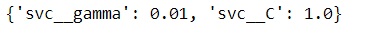

In [27]:
#print (f'Train Accuracy SVM : {svm_rand_search.score(X_train,y_train):.3f}')
#print (f'Test Accuracy SVM : {svm_rand_search.score(X_test,y_test):.3f}')

### 3-3-3-2. 최적의 하이퍼패러미타를 적용한 모델링 학습

In [28]:
pipe_svc = make_pipeline(StandardScaler(), SVC(C=1.0, gamma=0.01, probability=True))

In [29]:
pipe_svc_clf = pipe_svc

In [30]:
'''
# Feature Scaling

sc = StandardScaler()
X_train = sc.fit_transform(X_train)

#X_test = sc.transform(X_test)

'''

'\n# Feature Scaling\n\nsc = StandardScaler()\nX_train = sc.fit_transform(X_train)\n\n#X_test = sc.transform(X_test)\n\n'

In [31]:
## Model fitting

pipe_svc_clf.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma=0.01, probability=True))])

In [32]:
## Prediction

y_pred_svc = pipe_svc_clf.predict(X_test)

### 3-3-3-3. 평가(Evaluation)

In [34]:
'''
    Classification Report

'''

## Define the traget names
target_names = ['Down Day', 'Stay' ,'Up Day']

## Build a classifcation report
svc_report = classification_report(y_true = y_test, y_pred = y_pred_svc, target_names = target_names, output_dict = True)

## Add it to a data frame, transpose it for readability.
svc_report_df = pd.DataFrame(svc_report).transpose()
svc_report_df

,precision,recall,f1-score,support
Down Day,0.373832,0.327706,0.349253,54439.000000
Stay,0.346804,0.113160,0.170641,50053.000000
Up Day,0.347936,0.617964,0.445205,52105.000000
accuracy,0.355709,0.355709,0.355709,0.355709
macro avg,0.356190,0.352943,0.321700,156597.000000
weighted avg,0.356576,0.355709,0.324090,156597.000000


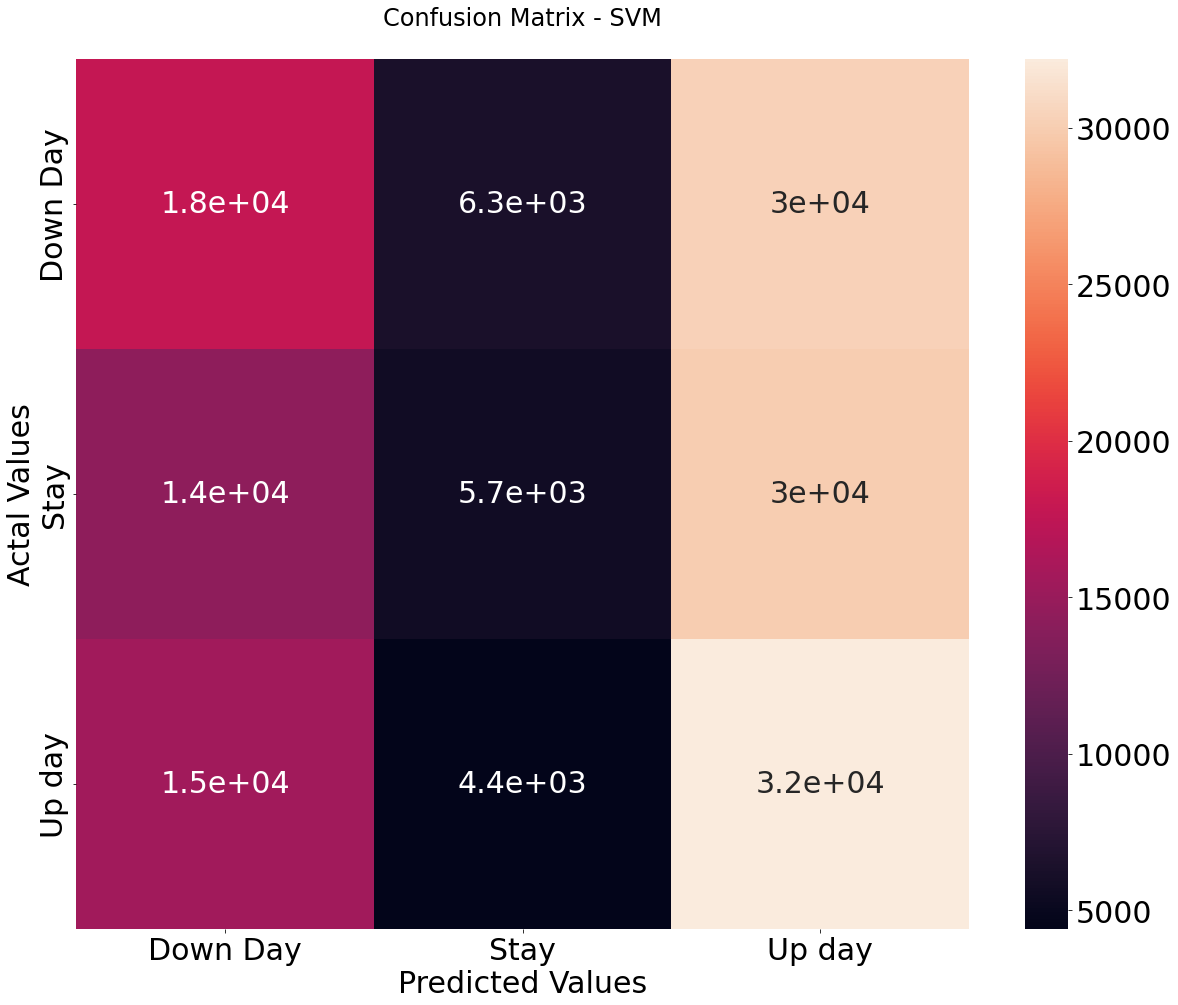

In [36]:
'''
    Confusion Matrix
'''

svc_matrix = confusion_matrix(y_test, y_pred_svc)
svc_matrix

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
svc_matrix_df = pd.DataFrame(svc_matrix,
                            index = ['Down Day','Stay','Up day'], 
                            columns = ['Down Day','Stay','Up day'])

#Plotting the confusion matrix
plt.figure(figsize=(20,16))
sns.heatmap(svc_matrix_df, annot=True)
plt.rc('font', size=20) 
plt.title('Confusion Matrix - SVM\n')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [37]:
y_prob_svc = pipe_svc_clf.predict_proba(X_test)

In [38]:
'''
  * AUC(Area Under the ROC Curve)
  
    ROC curve의 밑면적.   
    0~1까지로 1에 가까울수록 좋은 모델   
    https://koreapy.tistory.com/752

'''
#y_prob_svc = pipe_svc_clf.predict_proba(X_test)

n_classes = 3

macro_roc_auc_ovo = roc_auc_score(y_test, y_prob_svc, multi_class="ovo",
                                  average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, y_prob_svc, multi_class="ovo",
                                     average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob_svc, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob_svc, multi_class="ovr",
                                     average="weighted")

print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print('---------------------------------------')
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.506784 (macro),
0.506797 (weighted by prevalence)
---------------------------------------
One-vs-Rest ROC AUC scores:
0.506683 (macro),
0.506951 (weighted by prevalence)


### 3-3-3-4. 학습결과 저장(백테스팅용)

In [40]:
# 학습모델이 예측한 Label

svc_predicted_label = pd.DataFrame({'SVM_Predicted_label':y_pred_svc})

In [41]:
svc_predicted_label

,SVM_Predicted_label
0,1
1,1
2,1
3,1
4,-1
...,...
156592,-1
156593,-1
156594,-1
156595,-1


In [42]:
y_prob_svc

array([[0.3096841 , 0.17767422, 0.51264168],
       [0.27417741, 0.17530517, 0.55051742],
       [0.32474281, 0.23369046, 0.44156673],
       ...,
       [0.54939846, 0.05540975, 0.39519179],
       [0.53901145, 0.05545034, 0.40553821],
       [0.51453848, 0.05386155, 0.43159997]])

In [43]:
# 학습모델이 예측한 확률 Dataframe


column_names = ['SVM_Down Day','SVM_Stay','SVM_Up day']

svc_pred_prob = pd.DataFrame(y_prob_svc, columns=column_names)

In [44]:
svc_pred_prob

,SVM_Down Day,SVM_Stay,SVM_Up day
0,0.309684,0.177674,0.512642
1,0.274177,0.175305,0.550517
2,0.324743,0.233690,0.441567
3,0.388259,0.197816,0.413926
4,0.363465,0.283827,0.352708
...,...,...,...
156592,0.549049,0.064681,0.386271
156593,0.541344,0.054793,0.403863
156594,0.549398,0.055410,0.395192
156595,0.539011,0.055450,0.405538


In [46]:
# Predictied labels과 Prediction probabilities를 합치기

svc_pred_prob_total = pd.merge(svc_predicted_label, svc_pred_prob, left_index=True, right_index=True)
svc_pred_prob_total

,SVM_Predicted_label,SVM_Down Day,SVM_Stay,SVM_Up day
0,1,0.309684,0.177674,0.512642
1,1,0.274177,0.175305,0.550517
2,1,0.324743,0.233690,0.441567
3,1,0.388259,0.197816,0.413926
4,-1,0.363465,0.283827,0.352708
...,...,...,...,...
156592,-1,0.549049,0.064681,0.386271
156593,-1,0.541344,0.054793,0.403863
156594,-1,0.549398,0.055410,0.395192
156595,-1,0.539011,0.055450,0.405538


In [48]:
# csv 파일 출력

svc_pred_prob_total.to_csv(os.getenv('HOME') + '/aiffel/svc_pred_prob_all_features_220607_7.csv')

## 3-3-5. 학습결과 취합(Back testing용)   
Date, Open, High, Low, CLose, Volume 열 추가

In [ ]:
dataset_0 = pd.read_csv('/content/gdrive/MyDrive/project/final_featured_dataset_preprocessed2.csv')
dataset_0

In [ ]:
dataset_0.columns

In [ ]:
# 필요없는 columns 삭제
dataset_0 = dataset_0.drop(['Unnamed: 0'], axis=1)
dataset_0

In [ ]:
dataset_1 = pd.read_csv('/content/gdrive/MyDrive/project/lgbm_pred_prob_2.csv')
dataset_1

In [ ]:
dataset_1 = dataset_1.set_index('Unnamed: 0')

In [ ]:
dataset_1

In [ ]:
dataset_2 = pd.read_csv('/content/gdrive/MyDrive/project/rf_pred_prob_2.csv')
dataset_2

In [ ]:
dataset_2 = dataset_2.set_index('Unnamed: 0')
dataset_2

In [ ]:
dataset_3 = pd.read_csv('/content/gdrive/MyDrive/project/log_pred_prob_2.csv')
dataset_3

In [ ]:
dataset_3 = dataset_3.set_index('Unnamed: 0')
dataset_3

In [ ]:
dataset_3

In [ ]:
dataset_1

In [ ]:
dataset_2

In [ ]:
dataset_1.to_csv('/content/gdrive/MyDrive/project/dataset_1.csv')

In [ ]:
dataset_2.to_csv('/content/gdrive/MyDrive/project/dataset_2.csv')

In [ ]:
dataset_3.to_csv('/content/gdrive/MyDrive/project/dataset_3.csv')

In [ ]:
lgbm_rf_log = pd.read_csv('/content/gdrive/MyDrive/project/lgbm_rf_log.csv')
lgbm_rf_log

In [ ]:
import missingno as msno

msno.matrix(lgbm_rf_log)

In [ ]:
msno.bar(lgbm_rf_log)

In [ ]:
#lgbm_rf_log = lgbm_rf_log.set_index('Unnamed: 0')
lgbm_rf_log

In [ ]:
dataset

In [ ]:
dataset_merge_col = pd.merge(dataset,lgbm_rf_log, on='Unnamed: 0')
dataset_merge_col

In [ ]:
msno.matrix(dataset_merge_col)

In [ ]:
dataset_merge_col.to_csv('/content/gdrive/MyDrive/project/dataset_merge_col.csv')

In [ ]:
dataset = pd.read_csv('/content/gdrive/MyDrive/project/final_featured_dataset_preprocessed2_window.csv')

In [ ]:
dataset

In [ ]:
final_labeled_dataset = pd.read_csv('/content/gdrive/MyDrive/project/final_labeled_dataset.csv')

final_labeled_dataset

In [ ]:
final_labeled_dataset = final_labeled_dataset.dropna(axis=0)
final_labeled_dataset

In [ ]:
# 필요없는 columns 삭제
final_labeled_dataset = final_labeled_dataset.drop(['Unnamed: 0'], axis=1)
final_labeled_dataset

In [ ]:
# 데이터프레임 인덱스 리셋

final_labeled_dataset.reset_index(drop=False, inplace=True)
final_labeled_dataset

In [ ]:
# 필요없는 columns 삭제
final_labeled_dataset = final_labeled_dataset.drop(['index'], axis=1)
final_labeled_dataset

In [ ]:
msno.bar(final_labeled_dataset)

In [ ]:
msno.matrix(final_labeled_dataset)

In [ ]:
output_lgbm_rf_log_220606_3 = pd.read_csv('/content/gdrive/MyDrive/project/output_lgbm_rf_log_220606_3.csv')
output_lgbm_rf_log_220606_3

In [ ]:
msno.matrix(output_lgbm_rf_log_220606_3)

In [ ]:
msno.bar(output_lgbm_rf_log_220606_3)

## 3-3-6. Ensemble Learning - Stacking

In [ ]:
rfc = rand_frst_clf
svmc = svm_clf
lgbc = lgb_clf
logc = log_clf

In [ ]:
estimators = [('rfc',rfc),
            #  ('svmc',svmc),
              ('lgbc',lgbc),
              ('logc',logc)] 
              #list of (str, estimator)

In [ ]:
lr = LogisticRegression()

In [ ]:
sclf = StackingClassifier(estimators=estimators, final_estimator=lr)

In [ ]:
sclf.fit(X_train,y_train)

In [ ]:
y_pred_stacked = sclf.predict(X_test)

## 3-3-7. Ensemble Learning - Voting

*Voting modes: hard, soft*  

hard 보다는 soft가 안전한 선택임

In hard mode, the winning prediction is the one with “the most votes”. In Figure 2 we see an example of how the Voting Classifier works in hard mode. On the other hand, the Voting Classifier in soft mode considers the probabilities thrown by each ML model, these probabilities will be weighted and averaged, consequently the winning class will be the one with the highest weighted and averaged probability.

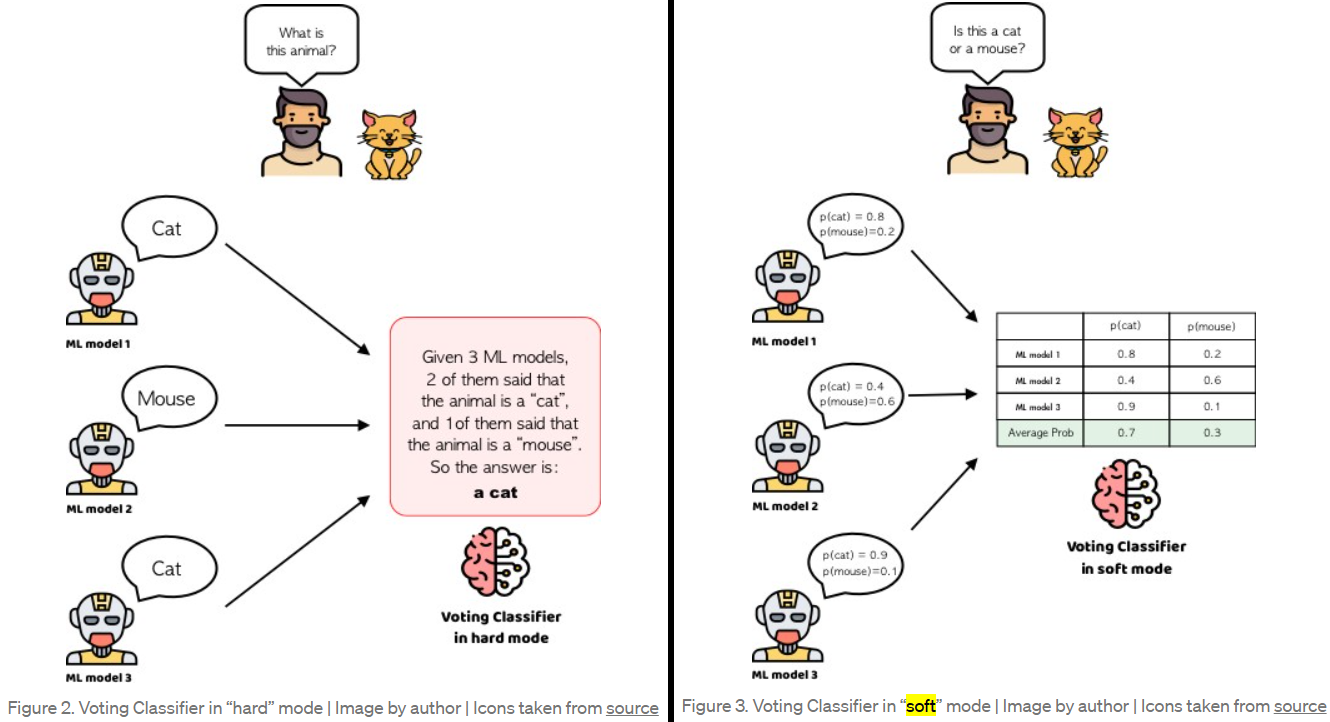

In [ ]:
vc = VotingClassifier(estimators=estimators, voting='soft')

In [ ]:
vc.fit(X_train,y_train)

In [ ]:
y_pred_voting = vc.predict(X_test)